# Efeitos da precessão no céu noturno

A precessão é um fenômeno físico/astronômico que consiste na mudança da direção do eixo de rotação de um objeto. Na nossa discussão vai ser considerada a precessão dos eixos de rotação da Terra. O objetivo do trabalho é esclarecer seus efeitos a partir de uma discussão e de com auxilio computacional, ilustrar com animações a dinâmica celeste que se apresenta.

## Falsas crenças e desinformação

Primeiro fato a se discutir é o de porquê tal discussão é necessária. A resposta vem de alguns sites mais relevantes em uma pesquisa sobre o tema e está normalmente atrelado à sites de astrologia, que confundem algumas informações. É comum encontrar dito o fato de que "Ophiucus se encontra na Ecliptica devido ao movimento de precessão". É difícil dizer com certeza de onde surgiu essa falsa concepção. Fato é, é bem difundida.

Uma teoria é a seguinte. De tempos em tempos surge a notícia que o Zodíaco (Constelações da Ecliptica) é composto por 13, e não as 12 constelações tradicionais da Astrologia. Isso gera certa agitação e textos que discutem o fato informadamente, muitas vezes discutem dois conceitos que passam a mesma ideia ao mesmo tempo. Um deles é o de que Ophiucus não é reconhecido como parte do Zodíaco e faz parte da ecliptica. O outro fato, finalmente, é o efeito que de fato, a ecliptica tem de mudar a constelação que se encontra no ponto vernal, em outras palavras, a posição do equador celeste em relação à eclíptica. Agora o problema, muito que lêem essa notícia acabam por confundir os efeitos, o que é compreensível por notícias como essa:

"Como disse indicam que as constelações reais estiveram mudando em relação com os signos astrológicos em quase um mês no curso dos últimos 2000 anos. Explica-se com a precessão dos chamados equinócios e afirmam que os astrólogos suprimiram-se de uma constelação (número 13), o portador de cobra (Ofiúco), apesar do fato de que o Sol passa cada ano através desta constelação."

Fonte: https://seuhoroscopo.com.br/ophiuchus-ofiuco-como-novo-sinal-ou-desconhecimento-da-astrologia/#:~:text=Este%20%C3%A9%20o%20argumento%20que,a%20Ofi%C3%BAco%2C%20o%20estudo%20astrol%C3%B3gico.&text=Explica%2DSe%20com%20a%20precess%C3%A3o,cada%20ano%20atrav%C3%A9s%20desta%20constela%C3%A7%C3%A3o.

Esta fonte sabe que os dois fatos são distintos. Contudo, ao leitor desatento ou desinformado pode parecer que existe uma conexão, e que a precessão é responsável pela "inclusão" de Ophiucus na Ecliptica. Tal interpretação é encontrado em diverso lugares. Alguns exemplos:

"Ophiuchus é tido como a 13ª constelação zodiacal porque, durante a precessão dos equinócios (que decorre durante cerca de 26.000 anos), se foi “introduzindo” parcialmente entre Sagitário e Escorpião (ver imagem  – OPH entre SGR e SCO), na eclíptica, na faixa que corresponde ao trajecto aparente do sol, tal como projectado pelo homem."

Fonte: https://www.noenigma.com/2011/02/13-signo-ophiuchus-o-portador-da.html

Ou então: 

"Quando o Zodíaco foi originalmente nomeado, a Eclíptica não passava pelo Ofiúco, de forma que esta constelação não foi incluída. Hoje em dia, sim, em função da precessão,  Ofiúco recebe a passagem da linha da Eclíptica e o Sol passa um bom tempo aqui depois de ter adentrado a Cabeça do Escorpião e passado ao largo de sua estrela Alpha, Antares."

Fonte: https://sobreophiucuseserpens.blogspot.com/2013/11/meu-amor-pelas-estrelas.html

Pode ser que a teoria não seja correta, ou não totalmente. Fato é que existe muita confusão em torno do fenômeno e maiores explicações é de muita relevência.

## A Precessão não pode variar a Ecliptica

Uma forma de visualizar que a precessão não pode ser responsável pela variação da ecliptica é imaginar que não  pode existir mudança dos eixos da Terra que seja capaz de mudar a posição relativa do Sol-Terra-Constelação. Isso é facil de ver com uma imagem do sistema em mãos. Tal efeito só pode ser atingido se houver alguma variação na inclinação do plano de translação da Terra em torno do Sol.

# Recursos computacionais e simulações

Algumas bibliotecas que serão usadas durante o programa

In [2]:
from matplotlib import pyplot as p
import math
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.mpl as mpl
from matplotlib.animation import FuncAnimation
import matplotlib

Ao longo do nosso programa utilizaremos coordenadas polares, uma vez que tratamos de esferas. Usando estas, podemos fazer projeções planares destas esferas.

In [2]:
#List of Right Ascension, Spherical Coordinates
#We do it to 4 Pi so we shift the function for a cicle

teta = np.arange(0,4*math.pi, 0.01)

Aqui temos a primeira variável que se pode modificar, a inclinação do eixo de rotação da terra "a"

In [3]:
a = math.radians(23.45) #Earth Declination

A função da Ecliptica, advinda da intersecção da esfera celeste com um plano da ecliptica.

In [4]:
#Set the function for the ecliptc
#Ideally we would add 2Pi to the sin function, from Pi to 3Pi

teta_trig = np.delete(teta, 0) #Avoid division by 0

#Discontinuos function, divided by domains

Ecliptc_1 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi))) for i in range(0,314)]
Ecliptc_2 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi)))+math.pi for i in range(314,628)]
Ecliptc_3 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi))) for i in range(628,942)]
Ecliptc_4 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi)))+math.pi for i in range(942,1256)]
Ecliptc = np.concatenate([Ecliptc_1,Ecliptc_2, Ecliptc_3, Ecliptc_4])

A partir daqui foram necessarios algumas tabelas que estão disponíveis em https://github.com/eleanorlutz/western_constellations_atlas_of_space. Em geral, coordenadas de objetos celestes em geral, como os explorados a seguir.

In [5]:
# Import constellation data
constellations = pd.read_csv('./data/constellations.csv')
display(constellations.head())

,name,ra,dec
0,AND,"[23.5357132, 23.4684925, 23.4012642, 23.334035...","[35.1897736, 35.1880264, 35.1860695, 35.183898..."
1,ANT,"[9.7783384, 9.711378100000001, 9.6444119999999...","[-24.5768433, -24.569940600000002, -24.5628623..."
2,APS,"[13.858232500000002, 13.8653402, 13.8736773000...","[-76.62335209999999, -77.6230698, -78.6227417,..."
3,AQL,"[18.692411399999997, 18.6916103, 18.6908112, 1...","[-2.8842952, -1.8843668999999998, -0.884438800..."
4,AQR,"[20.645000500000002, 20.6443596, 20.6437206, 2...","[-7.563462299999999, -6.563508000000001, -5.56..."


In [6]:
#Import asterism data

asterisms = pd.read_csv('./data/asterisms.csv')
display(asterisms.head())

,constellation,num_pairs,stars,name,ra,dec,zodiac
0,Aql,8,"['98036', '97649', '97649', '97278', '97649', ...",Aquila,"[19.921887, 19.846388, 19.846388, 19.770994, 1...","[6.406763, 8.868322000000003, 8.86832200000000...",False
1,And,5,"['677', '3092', '3092', '5447', '9640', '5447'...",Andromeda,"[0.139791, 0.655462, 0.655462, 1.162194, 2.064...","[29.090432, 30.861024, 30.861024, 35.620558, 4...",False
2,Scl,3,"['116231', '4577', '4577', '115102', '115102',...",Sculptor,"[23.549512, 0.976766, 0.976766, 23.313733, 23....","[-37.818268, -29.357449, -29.357449, -32.53202...",False
3,Ara,7,"['88714', '85792', '85792', '83081', '83081', ...",Ara,"[18.11052, 17.530695, 17.530695, 16.977006, 16...","[-50.09147700000001, -49.876145, -49.876145, -...",False
4,Lib,5,"['77853', '76333', '76333', '74785', '74785', ...",Libra,"[15.897093, 15.592104999999998, 15.59210499999...","[-16.729293, -14.789537, -14.789537, -9.382917...",True


In [7]:
#Import constellations names data

const_names = pd.read_csv('./data/centered_constellations.csv', encoding="latin-1")
display(const_names.head())

,name,name_meaning,class,constellation,ra,dec
0,Apus,Bird of Paradise,animal,Aps,16,-75
1,Aquila,Eagle,animal,Aql,20,5
2,Aries,Ram,animal,Ari,3,20
3,Camelopardus,Giraffe,animal,Cam,6,70
4,Capricornus,Sea goat,animal,Cap,21,-20


Podemos agora fazer uma ilustração do céu com a eclíptica, asterismos e seus limites.

Aqui, o bloco de código se resume à fazer loops para plotar as constelções, seus limites, e outros elementos da imagem final. Para as constelações e limites, basta conseguir das tabelas acimas, as coordenadas dos pontos relevantes para se traças os desenhos.

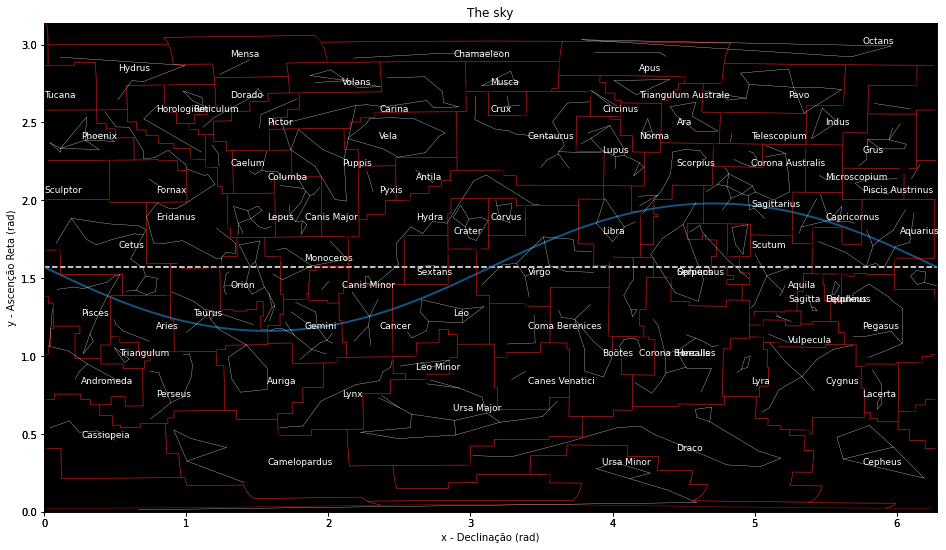

In [8]:
fig = p.figure(figsize=(16,9))

p.ylim(0,math.pi)
p.xlim(0,2*math.pi)
  
# naming the x axis
p.xlabel('x - Declinação (rad)')
# naming the y axis
p.ylabel('y - Ascenção Reta (rad)')
  
#backgroud color and axes config
ax = p.axes()
ax.set_facecolor("black")
ax.set_xlim([0,2*math.pi])
ax.set_ylim([0,math.pi])

# giving a title to my graph
n = 1
p.title(f'The sky')

# plot the horizontal dashed line
ax.axhline(y=math.pi/2, color='w', linestyle='--', linewidth=1.5, alpha=1)

#plot Ecliptic
ax.plot(teta_trig[0:628], Ecliptc[0:628], linewidth=2, alpha=0.7)

#plot Constellations limits
# Aqui, faz-se um loop pelos dados da tabela referentes aos vertices dos limites
for index, row in constellations.iterrows():
    ras = [math.radians(float(x)*360/24) for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [math.radians(abs(float(x)-90)) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    #Avoid horizontal lines that crosses the map
    m = 0
    for n in range(len(ras)-1):
        if (abs(ras[n+1]-ras[n]))<5: #if the line distance is ok, keep looking at list
            next
        else: # If is not, plot what you have, create new limit and keep going on other side
            ax.plot(ras[m+1:n], decs[m+1:n], lw=0.5, alpha=0.6, color='#ff2620')
            m = n
            
    #plor the ones that were not plotted
    ax.plot(ras[m+1:n], decs[m+1:n], lw=0.5, alpha=0.6, color='#ff2620')

#Plot Asterism
#Novamente, basta um loop pelos dados importados sobre asterismos
for index, row in asterisms.iterrows():
    ras = [math.radians(float(x)*360/24) for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [math.radians(abs(float(x)-90)) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = 'w'
    if row['zodiac'] == True: 
        #color = '#fcb322'
        color = 'w'
    assert len(asterisms)%2 == 0
    for n in range(int(len(asterisms)/2)):
        #Avoid horizontal lines that crosses the plane
        if len(ras[n*2:(n+1)*2])>1: #if coordinates exists
            if (abs(ras[n*2:(n+1)*2][1] - ras[n*2:(n+1)*2][0])) < 5: #if line size is ok, plot it
                ax.plot(ras[n*2:(n+1)*2], decs[n*2:(n+1)*2], color=color, lw=0.3)

#Plot Names for Constellation
for index, row in const_names.iterrows(): 
    ax.text(math.radians(row['ra']*360/24), math.radians(abs(row['dec']-90)), row['name'], ha='left', va='top', fontsize=9, color='w')

Se for da vontade do leitor baixar a figura, é possível ao rodar a seguinte linha

In [ ]:
fig.savefig('sky.png', dpi=fig.dpi)

Vamos agora nos aventurar em tentar animar os efeitos do movimento de precessão no céu noturno. Definimos novamente alguns parametros. Se for da vontade, é possível agora especificar o grau de inclinação da Ecliptica.

In [9]:
a = math.radians(23.45) #Earth Declination

teta_trig = np.delete(teta, 0) #Avoid division by 0

#Discontinuos function, divided by domains

Eq_1 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi))) for i in range(0,314)]
Eq_2 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi)))+math.pi for i in range(314,628)]
Eq_3 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi))) for i in range(628,942)]
Eq_4 = [math.atan(1/(-math.tan(a)*math.sin(teta_trig[i]+math.pi)))+math.pi for i in range(942,1256)]
Eq = np.concatenate([Eq_4,Eq_3, Eq_2, Eq_1])

Um problema encontrado foi o de que, ao se animar a Ecliptica, deve-se também animar todas as constelações. O que pode não ser muito prático. Mudando de perspectiva, é possível fazer uma animação onde o Equador se mova. Para isso, teremos que modificar nosso codigo para aplicar uma transformação de rotação na esfera, de forma que a Ecliptica se tome a posição ocupada posteriormente pelo Equador.

Basta aplicar novamente os métodos para plotar os dado acima, porém deve-se transformar ponto por ponto as coordenadas antes de se colocar no gráfico.

Saturno foi também adicionado à simulação. Para tal, é representado um ponto que mostra a posição relativa de Saturno em relação às constelações, visto da Terra. Primeiro, é necessario saber que Saturno possui uma inclinação em relação à ecliptica de aproximadamente 2º 18´. Ou seja, visto da Terra, Saturno manterá uam distancia aproximada da eclíptica. Outro fato importante sobre a posição de Saturno em relação à esfera celeste é de que ele deve se mover a medida que a posição relativa Terra-Saturno também muda. Esse movimento é um pouco mais complexo, mas pode ser explicado pelos periodos e raios de translações dos dois planetas. Partes mais complexas desse movimento são expressas na simulação abaixo, mas não são relevantes na simulação principal, pela escala de tempo. Nessa última, consideramos apenas o movimento geral médio do planeta em relação aos planetas.

Em sumo, note na simulação que para largas escalas de tempo, Saturno tem movimento geral ao longo as constelações com periodo determinado pelos periodos de rotação, dado pelas leis de Kepler.

/home/joao/anaconda3/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/joao/anaconda3/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
<ipython-input-10-c02d3fb5cd9b>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self.r    = np.array(r, dtype=np.float)
<ipython-input-10-c02d3fb5cd9b>:20: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To sil

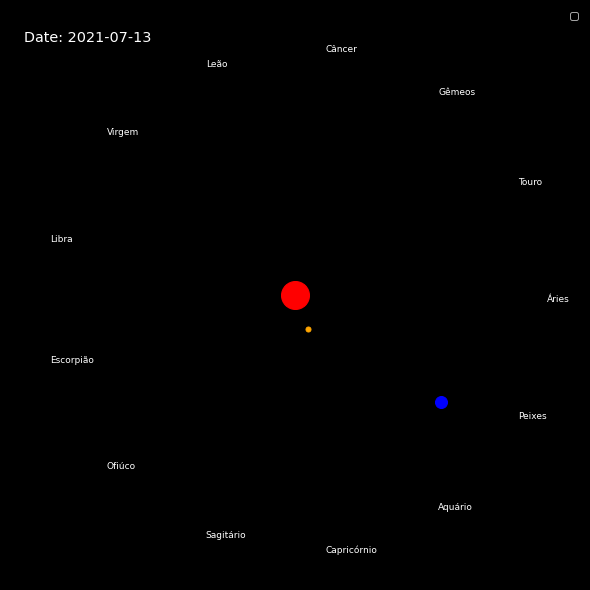

In [10]:
##########################################################################################################
# Esse código é uma adaptação do código criado por 'ChongChong He'
# disponível em https://medium.com/analytics-vidhya/simulating-the-solar-system-with-under-100-lines-of-python-code-5c53b3039fc6
##########################################################################################################

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time
from astroquery.jplhorizons import Horizons

sim_start_date = "2021-07-12"     # simulating a solar system starting from this date
sim_duration = 10 * 365                # (int) simulation duration in days
m_earth = 5.9722e24 / 1.98847e30  # Mass of Earth relative to mass of the sun
m_moon = 7.3477e22 / 1.98847e30

class Object:                   # define the objects: the Sun, Earth, Mercury, etc
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
        self.timestamp = ax.text(.03, .94, 'Date: ', color='w', transform=ax.transAxes, fontsize='x-large')
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        self.timestamp.set_text('Date: ' + Time(self.time, format='jd', out_subfmt='date').iso)
        return plots + lines + [self.timestamp]

plt.style.use('dark_background')
fig = plt.figure(figsize=[8, 8])
ax = plt.axes([0., 0., 1., 1.],xlim=(-8, 8), ylim=(-8, 8))
ax.set_aspect('equal')
ax.axis('off')
ss = SolarSystem(Object("Sun", 28, 'red', [0, 0, 0], [0, 0, 0]))
ss.time = Time(sim_start_date).jd
colors = ['orange', 'blue']
sizes = [5, 12]
names = ['Earth', 'Jupiter']
texty = [1, 1.1]

#constelations
const_names = ['Áries', 'Touro', 'Gêmeos', 'Câncer', 'Leão', 'Virgem', 'Libra', 'Escorpião', 'Ofiúco', 'Sagitário', 'Capricórnio', 'Aquário', 'Peixes']
for i,j in zip(np.arange(0,2*math.pi,2*math.pi/13), range(0,13)):
    ax.text(7*math.cos(i),7*math.sin(i), const_names[j], ha='left', va='top', fontsize=9, color='w')

for i, nasaid in enumerate([3, 5]):  # The 1st, 2nd, 3rd, 4th planet in solar system
    obj = Horizons(id=nasaid, location="@sun", epochs=ss.time, id_type='id').vectors()
    ss.add_planet(Object(nasaid, sizes[i], colors[i], 
                         [np.double(obj[xi]) for xi in ['x', 'y', 'z']], 
                         [np.double(obj[vxi]) for vxi in ['vx', 'vy', 'vz']]))

ax.legend(["Sol", "Terra","Saturno"],["yellow","orange","blue"])
    
def animate(i):
    return ss.evolve()

ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

In [1]:
ani.save('Planets.gif')

NameError: name 'ani' is not defined

Note como, olhando da Terra, Saturno deve ter trajétoria retrógrada, em relação às constelações, em pequenos períodos de tempo da simulação. Sua declinação permanece aparentemente constante. Note também que Saturno deve dar sua volta completa em volta do Sol para que possa ser vitso na mesma posição relativa em relação as estrelas. Para melhor visualizar este movimento, podemos fazer outra animação.

Nesta, vamos ajeitar os parametros de forma à facilitar a representação. Usaremos coordenadas polares e traçaremos uma linha que una os dois planetas para mostras a linha de visada relativa. Assim:

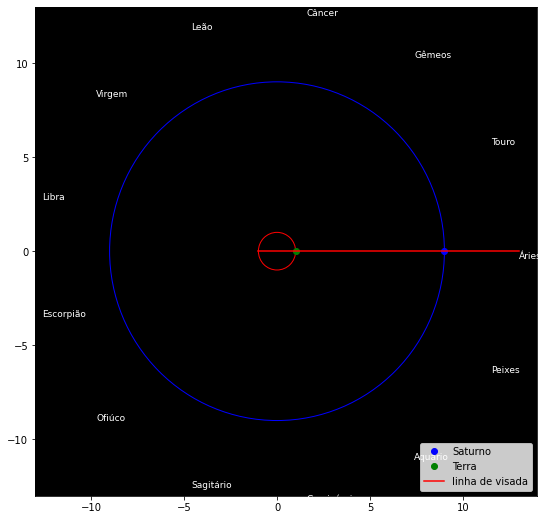

In [101]:
fig, ax = p.subplots(figsize=(9,9))
p.axis('off')

# raio orbital da terra
rt = 1
# raio orbital de Saturno
rs = 9

#configurações gerais de eixos
ax = p.axes()
ax.set_facecolor("black")
ax.set_ylim([-13,13])
ax.set_xlim([-13,14])

# Inicializando ambos os plots do planetas
circle_earth = p.Circle((0, 0), rt, color='r',fill=False)
circle_saturn = p.Circle((0, 0), rs, color='blue',fill=False)

ax.add_patch(circle_earth)
ax.add_patch(circle_saturn)

Saturn, = ax.plot(rs, 0, 'bo', label='Saturno')
Earth, = ax.plot(rt, 0, 'go', label = 'Terra')

#Para referencia, o zodiaco:
const_names = ['Áries', 'Touro', 'Gêmeos', 'Câncer', 'Leão', 'Virgem', 'Libra', 'Escorpião', 'Ofiúco', 'Sagitário', 'Capricórnio', 'Aquário', 'Peixes']
for i,j in zip(np.arange(0,2*math.pi,2*math.pi/13), range(0,13)):
    ax.text(13*math.cos(i),13*math.sin(i), const_names[j], ha='left', va='top', fontsize=9, color='w')

#Plotting the line
x = np.linspace(-1,13,100)
y = (0*x+0)
line, = ax.plot(x, y,'-r', label='linha de visada')

def lineFromPoints(P, Q):
 
    a = Q[1] - P[1]
    b = P[0] - Q[0]
    c = a*(P[0]) + b*(P[1])
 
    if(b < 0):
        return [a,-b,c]
    else:
        return [a,b,c]

ax.legend(loc='lower right')

#Para a animação
def animate(i):
    coordy_saturn = 9*math.sin(i/300+math.pi/4)
    coordx_saturn = 9*math.cos(i/300+math.pi/4)
    coordy_earth = math.sin(i/10)
    coordx_earth = math.cos(i/10)
    Saturn.set_ydata(coordy_saturn)
    Saturn.set_xdata(coordx_saturn)
    Earth.set_ydata(coordy_earth)
    Earth.set_xdata(coordx_earth)
    
    #for the line connecting the planets
    a,b,c = lineFromPoints([coordx_earth, coordy_earth],[coordx_saturn, coordy_saturn])
    line.set_ydata((a*x-c)/b)
    
    return Saturn, Earth, line

anim = FuncAnimation(fig, animate, interval=200)

Para salvar a animação:

In [102]:
anim.save('retrogrado.gif', fps=200)

MovieWriter ffmpeg unavailable; using Pillow instead.


Adaptar a posição dos limites das contelações se mostrou de certa complexidade e será evitado nessa parte do projeto. Aqui mostra-se o movimento relativo de jupiter.

MovieWriter ffmpeg unavailable; using Pillow instead.


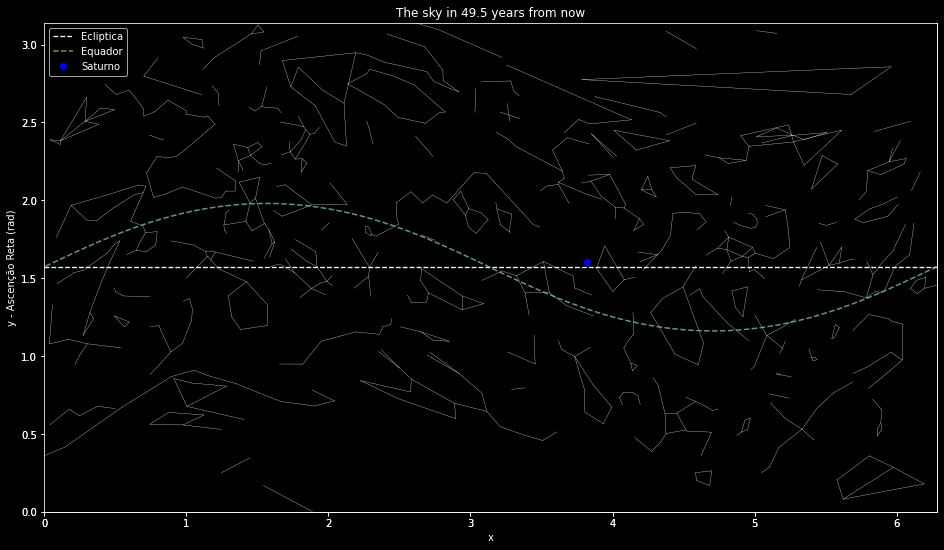

In [43]:
fig = p.figure(figsize=(16,9))

p.ylim(0,math.pi)
p.xlim(0,2*math.pi)
  
# naming the x axis
p.xlabel('x')
# naming the y axis
p.ylabel('y - Ascenção Reta (rad)')
  
#backgroud color and axes config
ax = p.axes()
ax.set_facecolor("black")
ax.set_xlim([0,2*math.pi])
ax.set_ylim([0,math.pi])

# giving a title to my graph
n = 1
p.title(f'The sky')

# plot the horizontal dashed line (Ecliptc)
p.axhline(y=math.pi/2, color='w', linestyle='--', linewidth=1.3, alpha=1, label='Ecliptica')

#Plot Asterism
for index, row in asterisms.iterrows():
    ras = [math.radians(float(x)*360/24) for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [math.radians(abs(float(x)-90)) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = 'w'
    if row['zodiac'] == True: 
        #color = '#fcb322'
        color = 'w'
    assert len(asterisms)%2 == 0
    
    for n in range(int(len(asterisms)/2)):
        
        dif = math.pi/2
        
        #Avoid horizontal lines that crosses the plane
        if len(ras[n*2:(n+1)*2])>1: #if coordinates exists
            
            if (abs(ras[n*2:(n+1)*2][1] - ras[n*2:(n+1)*2][0])) < 5: #if line size is ok, continue
                
                if (ras[n*2] < math.pi) and (ras[n*2+1] < math.pi): # Correcting perspective, shifting sphere 
                    df = [(decs[n*2]-dif+Eq[int(ras[n*2]*100)]), (decs[n*2+1]-dif+Eq[int(ras[n*2+1]*100)])]
                    
                    if df[1] > math.pi:
                        ras = [i+math.pi for i in ras]
                        df = [math.pi-(i%math.pi) for i in df]
                     
                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next
                
                if (ras[n*2] < math.pi) and (ras[n*2+1] > math.pi):
                    df = [(decs[n*2]-dif+Eq[int(ras[n*2]*100)])%math.pi, (decs[n*2+1]+Eq[int(ras[n*2+1]*100)]-dif)%math.pi]

                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next
                            
                if (ras[n*2] > math.pi) and (ras[n*2+1] > math.pi):
                    df = [(decs[n*2]+Eq[int(ras[n*2]*100)]-dif), (decs[n*2+1]+Eq[int(ras[n*2+1]*100)]-dif)]

                    if df[1] < 0:
                        ras = [i-math.pi for i in ras]
                        df = [abs(i) for i in df]
                         
                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next                            
                             
                if (ras[n*2] > math.pi) and (ras[n*2+1] < math.pi): 
                    df = [(decs[n*2]+Eq[int(ras[n*2]*100)]-dif)%math.pi, (decs[n*2+1]-dif+Eq[int(ras[n*2+1]*100)])%math.pi]

                    if (abs(df[1] - df[0]) > 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next 

                    
#plot Equator
x = teta_trig[0:628]
y = Eq[0:628]
line, = ax.plot(x, y, linestyle='--', linewidth=1.5, alpha=0.7, label='Equador')
line2, = ax.plot(0.766, 1.62, 'bo', label='Saturno')

## Positions for the planet

ap = math.radians(2.2) #Planet maximum Declination
tetap_trig = np.delete(teta, 0) #Avoid division by 0
Eqp = [ap * math.sin(i + math.pi) + 1.57 for i in np.arange(0,6.28,0.01)]


#legend
ax.legend()
        
def animate(i):
    ax.set_title(f'The sky in {i*0.5} years from now')
    line.set_ydata(Eq[(int(i/80)):(int(i/80))+628])
    line2.set_xdata((2.15 - i*0.11) % 6.28)
    line2.set_ydata(Eqp[(int(i*5.1) % 628)])
    return line, line2

anim = FuncAnimation(fig, animate, interval=200)

Note que nesse referancial, fica claro que a ecliptica não pode variar. Somento o ponto vernal o faz, fruto do movimento relativo do equador.

Para salvar a animação:

In [16]:
anim.save('saturn_movement.gif', fps=500)

MovieWriter ffmpeg unavailable; using Pillow instead.


Para uma escala de tempo maior considerando o movimento da ecliptica:

/home/joao/.local/lib/python3.8/site-packages/matplotlib/animation.py:973: UserWarning: Animation was deleted without rendering anything. This is most likely unintended. To prevent deletion, assign the Animation to a variable that exists for as long as you need the Animation.
  warnings.warn(


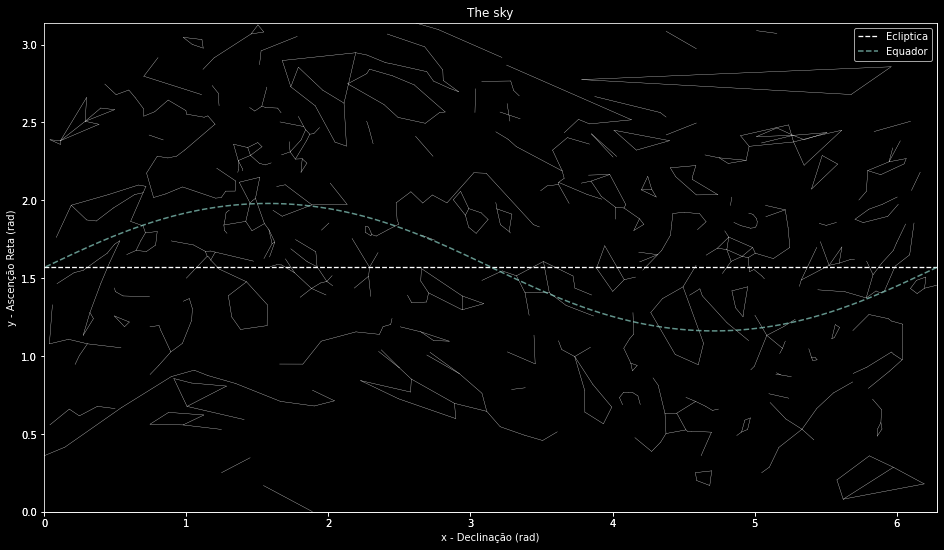

In [45]:
fig = p.figure(figsize=(16,9))

p.ylim(0,math.pi)
p.xlim(0,2*math.pi)
  
# naming the x axis
p.xlabel('x - Declinação (rad)')
# naming the y axis
p.ylabel('y - Ascenção Reta (rad)')
  
#backgroud color and axes config
ax = p.axes()
ax.set_facecolor("black")
ax.set_xlim([0,2*math.pi])
ax.set_ylim([0,math.pi])

# giving a title to my graph
n = 1
p.title(f'The sky')

# plot the horizontal dashed line (Ecliptc)
p.axhline(y=math.pi/2, color='w', linestyle='--', linewidth=1.3, alpha=1, label='Ecliptica')

#Plot Asterism
for index, row in asterisms.iterrows():
    ras = [math.radians(float(x)*360/24) for x in row['ra'].replace('[', '').replace(']', '').split(',')]
    decs = [math.radians(abs(float(x)-90)) for x in row['dec'].replace('[', '').replace(']', '').split(',')]
    color = 'w'
    if row['zodiac'] == True: 
        #color = '#fcb322'
        color = 'w'
    assert len(asterisms)%2 == 0
    
    for n in range(int(len(asterisms)/2)):
        
        dif = math.pi/2
        
        #Avoid horizontal lines that crosses the plane
        if len(ras[n*2:(n+1)*2])>1: #if coordinates exists
            
            if (abs(ras[n*2:(n+1)*2][1] - ras[n*2:(n+1)*2][0])) < 5: #if line size is ok, continue
                
                if (ras[n*2] < math.pi) and (ras[n*2+1] < math.pi): # Correcting perspective, shifting sphere 
                    df = [(decs[n*2]-dif+Eq[int(ras[n*2]*100)]), (decs[n*2+1]-dif+Eq[int(ras[n*2+1]*100)])]
                    
                    if df[1] > math.pi:
                        ras = [i+math.pi for i in ras]
                        df = [math.pi-(i%math.pi) for i in df]
                     
                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next
                
                if (ras[n*2] < math.pi) and (ras[n*2+1] > math.pi):
                    df = [(decs[n*2]-dif+Eq[int(ras[n*2]*100)])%math.pi, (decs[n*2+1]+Eq[int(ras[n*2+1]*100)]-dif)%math.pi]

                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next
                            
                if (ras[n*2] > math.pi) and (ras[n*2+1] > math.pi):
                    df = [(decs[n*2]+Eq[int(ras[n*2]*100)]-dif), (decs[n*2+1]+Eq[int(ras[n*2+1]*100)]-dif)]

                    if df[1] < 0:
                        ras = [i-math.pi for i in ras]
                        df = [abs(i) for i in df]
                         
                    if (abs(df[1] - df[0]) < 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next                            
                             
                if (ras[n*2] > math.pi) and (ras[n*2+1] < math.pi): 
                    df = [(decs[n*2]+Eq[int(ras[n*2]*100)]-dif)%math.pi, (decs[n*2+1]-dif+Eq[int(ras[n*2+1]*100)])%math.pi]

                    if (abs(df[1] - df[0]) > 2.3): # Avoid vertical crossing lines
                        p.plot(ras[n*2:(n+1)*2], df, color=color, lw=0.3)
                    next 

                    
#plot Equator
x = teta_trig[0:628]
y = Eq[0:628]
line, = ax.plot(x, y, linestyle='--', linewidth=1.5, alpha=0.7, label='Equador')

#legend
ax.legend()
        
def animate(i):
    ax.set_title(f'The sky in {i*245} years from now')
    line.set_ydata(Eq[(i*6):(i*6)+628])
    return line, line2

anim = FuncAnimation(fig, animate, interval=200)

In [ ]:
anim.save('Ecliptic_movement.gif')

MovieWriter ffmpeg unavailable; using Pillow instead.
